In [1]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Data import

Import education data, filtering for rows which are only highschools that have grades 9, 10, 11, and 12.

In [2]:
school_data = pd.read_csv("data/CRDC 2015-16 School Data.csv", encoding = "ISO-8859-1")
school_layout = pd.read_csv("data/CRDC 2015-16 School Data Record Layout.csv", encoding = "ISO-8859-1")
school_data = school_data[school_data.SCH_GRADE_G09 =='Yes']
school_data = school_data[school_data.SCH_GRADE_G10 == 'Yes']
school_data = school_data[school_data.SCH_GRADE_G11 == 'Yes']
school_data = school_data[school_data.SCH_GRADE_G12 == 'Yes']
school_data = school_data[school_data.JJ == 'No']
school_data = school_data[(school_data.TOT_SATACT_M+school_data.TOT_SATACT_F)/(school_data['TOT_ENR_M'] + school_data['TOT_ENR_F'])<1]
school_data = school_data[school_data.SCH_SAL_TOTPERS_WFED>0]
len(school_data)
school_data.reset_index(drop=True,inplace=True)

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (2,6,23,24,25,30,31,1828) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


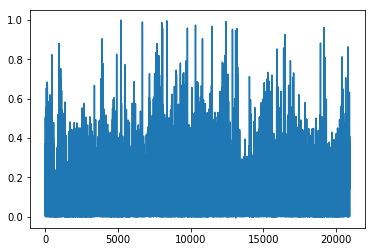

0

In [3]:
# SAT&ACT participation aggregate percent value

sat_data = school_data.iloc[: , 679:698]
test_participation = school_data['TOT_SATACT_M'] + school_data['TOT_SATACT_F']
school_population = school_data['TOT_ENR_M'] + school_data['TOT_ENR_F']
test_pop_percents = round(test_participation / school_population, 3)
plt.plot(test_pop_percents)
plt.show()
len(test_pop_percents[test_pop_percents>100])

In [4]:
'''
school_input_factors = pd.DataFrame()
school_input_factors['FUNDING_PER_STUDENT']=(school_data.SCH_SAL_TOTPERS_WFED+school_data.SCH_NPE_WFED) / (school_data.TOT_ENR_M + school_data.TOT_ENR_F)

school_input_factors['PERCENT_ENR_HI'] = (school_data.SCH_ENR_HI_M+school_data.SCH_ENR_HI_F)/(school_data.TOT_ENR_M + school_data.TOT_ENR_F)
school_input_factors['PERCENT_ENR_AM'] = (school_data.SCH_ENR_AM_M+school_data.SCH_ENR_AM_F+  school_data.SCH_ENR_HP_M+school_data.SCH_ENR_HP_F)/(school_data.TOT_ENR_M + school_data.TOT_ENR_F)
school_input_factors['PERCENT_ENR_AS'] = (school_data.SCH_ENR_AS_M+school_data.SCH_ENR_AS_F)/(school_data.TOT_ENR_M + school_data.TOT_ENR_F)
school_input_factors['PERCENT_ENR_BL'] = (school_data.SCH_ENR_BL_M+school_data.SCH_ENR_BL_F)/(school_data.TOT_ENR_M + school_data.TOT_ENR_F)
school_input_factors['PERCENT_ENR_WH'] = (school_data.SCH_ENR_WH_M+school_data.SCH_ENR_WH_F)/(school_data.TOT_ENR_M + school_data.TOT_ENR_F)
school_input_factors['PERCENT_ENR_TR'] = (school_data.SCH_ENR_TR_M+school_data.SCH_ENR_TR_F)/(school_data.TOT_ENR_M + school_data.TOT_ENR_F)

school_input_factors['CORP_PUNISH'] = (school_data.SCH_CORPINSTANCES_WODIS+school_data.SCH_CORPINSTANCES_WDIS)/(school_data.TOT_ENR_M + school_data.TOT_ENR_F)
school_input_factors['SCH_SIZE'] = (school_data.TOT_ENR_M + school_data.TOT_ENR_F)
school_input_factors['SUSPENSION'] = (school_data.SCH_OOSINSTANCES_WODIS+school_data.SCH_OOSINSTANCES_IDEA+school_data.SCH_OOSINSTANCES_504)/(school_data.TOT_ENR_M + school_data.TOT_ENR_F)
school_input_factors['EXPULSIONS'] = (school_data.TOT_DISCWODIS_EXPZT_M+school_data.TOT_DISCWODIS_EXPZT_F+school_data.SCH_DISCWODIS_EXPZT_LEP_M+school_data.SCH_DISCWODIS_EXPZT_LEP_F
)/(school_data.TOT_ENR_M + school_data.TOT_ENR_F)
school_input_factors['RETENSION'] = school_data.TOT_RET_G09_M+school_data.TOT_RET_G09_F+school_data.TOT_RET_G10_M+school_data.TOT_RET_G10_F+school_data.TOT_RET_G11_M+school_data.TOT_RET_G11_F+school_data.TOT_RET_G12_M+school_data.TOT_RET_G12_F
school_input_factors.RETENSION[school_input_factors.RETENSION<0] = 0
school_input_factors['CHARTER'] = school_data.SCH_STATUS_CHARTER.eq('Yes').mul(1)
school_input_factors.CORP_PUNISH[school_input_factors.CORP_PUNISH<0] = 0
school_input_factors['ENG_PROF'] = (school_data.TOT_LEPENR_M+school_data.TOT_LEPENR_F)/(school_data.TOT_ENR_M + school_data.TOT_ENR_F)
school_input_factors['SCH_TEACHERS_CURR_TOT'] = school_data['SCH_TEACHERS_CURR_TOT']
school_input_factors['TOT_ABSENT'] = (school_data['TOT_ABSENT_M']+school_data['TOT_ABSENT_F'])/(school_data.TOT_ENR_M + school_data.TOT_ENR_F)
'''
nul_vals = [-2,-5,-6,-7,-8,-9, '-2', '-5', '-6','-7','-8','-9']
rates = []
rates_full = []
for (columnName, columnData) in school_data.iteritems():
    error_rate = round(len(school_data[columnName][school_data[columnName].isin(nul_vals)])/school_data.shape[0], 3)
    column_name = columnName
    rates.append(error_rate)
    rates_full.append([error_rate, column_name])
    #print(error_rate, column_name)
input_columns = []
for [perc, name] in rates_full:
    if perc == 0:
        if school_data[name].dtype == 'int64':
            input_columns.append(name)
            
print(len(input_columns))

school_input_factors = school_data[input_columns]
totals = [s for s in input_columns if "TOT_" in s]
SAT_things = [s for s in input_columns if "SCH_SATACT" in s]
bad_things = SAT_things+totals+['SCHID']
school_input_factors.drop(bad_things,axis=1,inplace = True)


457


/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [5]:
school_input_factors

,SCH_ENR_HI_M,SCH_ENR_HI_F,SCH_ENR_AM_M,SCH_ENR_AM_F,SCH_ENR_AS_M,SCH_ENR_AS_F,SCH_ENR_HP_M,SCH_ENR_HP_F,SCH_ENR_BL_M,SCH_ENR_BL_F,...,SCH_ABSENT_TR_M,SCH_ABSENT_TR_F,SCH_ABSENT_LEP_M,SCH_ABSENT_LEP_F,SCH_ABSENT_504_M,SCH_ABSENT_504_F,SCH_ABSENT_IDEA_M,SCH_ABSENT_IDEA_F,SCH_TEACHERS_CURR_TOT,SCH_TEACHERS_PREV_TOT
0,0,0,14,0,0,0,0,0,554,0,...,0,0,0,0,0,0,0,0,38,37
1,260,221,2,2,5,2,0,2,20,20,...,2,2,8,5,0,2,14,5,72,71
2,92,95,2,0,2,2,0,0,0,2,...,0,0,0,2,2,0,5,2,30,25
3,77,65,2,2,2,0,0,0,5,5,...,0,0,5,2,0,0,8,5,38,32
4,2,2,0,0,0,2,0,2,2,2,...,0,0,0,0,0,0,5,0,29,29
5,11,8,0,0,2,2,2,0,5,2,...,0,0,0,0,0,0,5,5,19,15
6,113,116,0,2,80,95,2,0,428,398,...,8,8,17,26,11,11,2,0,208,177
7,47,41,0,0,47,41,2,2,227,188,...,5,5,11,8,5,5,2,0,125,110
8,35,26,5,8,77,65,2,5,224,185,...,0,0,0,2,2,2,8,8,102,197
9,38,47,2,5,62,62,2,2,212,164,...,0,5,2,5,5,5,0,0,100,73


## Regression Setup

In [6]:
def linear_regression(X, y):
    w, _, _, _ = np.linalg.lstsq(X, y, rcond=-1)
    return w

In [7]:
def fit_model(dfx, dfy):
    # Note: this is might not really be a fair way to do a training / testing split
    # since it will result in instances that were very close in time falling in
    # both the training and testing set
    X_train, X_test, y_train, y_test = \
        train_test_split(dfx, dfy)

    model = LinearRegression()
    model.fit(X_train, y_train)
#     for i, c in enumerate(cols):
#       print('w_%d (the weight for %s) = %f' % (i+1, c, model.coef_[i]))
    
#     print('w_%d (the weight for the bias term) = %f' % (len(cols) + 1, model.intercept_))

    print("\ny actual is within 5 of y predicted:")
    print('Accuracy on training set', (abs(model.predict(X_train) - y_train)<.05).mean())
    print('Accuracy on testing set', (abs(model.predict(X_test) - y_test)<.05).mean())
    print("\ny actual is within 10 of y predicted:")
    print('Accuracy on training set', (abs(model.predict(X_train) - y_train)<.10).mean())
    print('Accuracy on testing set', (abs(model.predict(X_test) - y_test)<.10).mean())
    return model

## Regression of School Success

In [8]:
# X_education = revs_total_1992.drop(columns=['STATE', 'AVG_MATH_8_SCORE'])
# y_education = revs_total_1992['AVG_MATH_8_SCORE']

# The columns we are inputting (the input)
X_experimental = school_input_factors #change assignent here

# The column(s) we are predicting (the output)
Y_experimental = test_pop_percents #change assignent here

In [9]:
X_experimental['bias'] = 1
# display the outputed weights to the input columns so that we can look
# at the calculated correlations relative to each input.
model_output = list(zip(linear_regression(X_experimental, Y_experimental), X_experimental.columns))

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [10]:
x_ed = X_experimental
y_ed = Y_experimental

#y_ed = y_ed[X_experimental.FUNDING_PER_STUDENT<15000]
#x_ed = x_ed[X_experimental.FUNDING_PER_STUDENT<15000]
'''
plt.figure(figsize=(30, 18))
for idx, col in enumerate(x_ed):
    plt.subplot(5, 3, idx+1)
    plt.ylim(0,50)
    plt.hexbin(x_ed[col], y_ed, gridsize=50, cmap='jet')
    plt.colorbar()
    plt.xlabel(col)
    plt.ylabel('Percent School Taking SAT')
    

plt.subplots_adjust(wspace=.2)
plt.show()
'''

"\nplt.figure(figsize=(30, 18))\nfor idx, col in enumerate(x_ed):\n    plt.subplot(5, 3, idx+1)\n    plt.ylim(0,50)\n    plt.hexbin(x_ed[col], y_ed, gridsize=50, cmap='jet')\n    plt.colorbar()\n    plt.xlabel(col)\n    plt.ylabel('Percent School Taking SAT')\n    \n\nplt.subplots_adjust(wspace=.2)\nplt.show()\n"

In [11]:
fit_model(x_ed,y_ed)


y actual is within 5 of y predicted:
Accuracy on training set 0.312917807347
Accuracy on testing set 0.313025210084

y actual is within 10 of y predicted:
Accuracy on training set 0.581269497676
Accuracy on testing set 0.576203208556


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
import pprint
norm_weights = []
for val, col in model_output:
    #print(col, val/x_ed[col].mean())
    norm_weights.append([col, val])
hello = sorted(norm_weights, key = lambda x: x[1])

pp = pprint.PrettyPrinter(indent=4)
pp.pprint(hello)

[   ['SCH_DISCWDIS_EXPZT_IDEA_AM_F', -0.14463564228767298],
    ['SCH_DISCWDIS_EXPWOE_IDEA_AS_F', -0.076165584408679238],
    ['SCH_DISCWDIS_EXPZT_IDEA_TR_F', -0.060739474460495192],
    ['SCH_DISCWDIS_EXPZT_IDEA_AS_F', -0.041900122819626073],
    ['SCH_DISCWDIS_REF_IDEA_HP_F', -0.036932940123530628],
    ['SCH_DISCWODIS_EXPZT_HP_F', -0.026499784707187377],
    ['SCH_DISCWDIS_EXPWE_IDEA_HP_M', -0.024095732278687956],
    ['SCH_DISCWODIS_TFRALT_AM_F', -0.021435316368272159],
    ['SCH_DISCWDIS_TFRALT_IDEA_HP_F', -0.016855841395120724],
    ['SCH_DISCWODIS_EXPZT_TR_M', -0.014729033437380652],
    ['SCH_DISCWODIS_EXPZT_AM_F', -0.014565763383923654],
    ['SCH_DISCWDIS_EXPWOE_IDEA_HP_M', -0.014164292741934058],
    ['SCH_DISCWDIS_EXPZT_LEP_F', -0.012078407802120413],
    ['SCH_DISCWDIS_TFRALT_IDEA_AM_F', -0.011990547067257922],
    ['SCH_DISCWODIS_EXPZT_AS_M', -0.011926675083104861],
    ['SCH_DISCWODIS_TFRALT_LEP_F', -0.011028116730609118],
    ['SCH_DISCWDIS_EXPWOE_IDEA_TR_M', -0.0108811